In [1]:
# Bubble sort
def bubble_sort(arr):
    n = len(arr)

    # Traverse through all array elements
    for i in range(n):
        # Last i elements are already in place
        for j in range(n - i - 1):
            # Swap if the element found is greater than the next element
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

    return arr


In [2]:
# Add early break
def bubble_sort_with_break(arr):
    n = len(arr)

    # Traverse through all array elements
    for i in range(n):
        # Flag to check if any swaps occurred during this pass
        swapped = False

        # Last i elements are already in place, so we don't need to check them
        for j in range(n - i - 1):
            # Swap if the element found is greater than the next element
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True

        # If no two elements were swapped during the inner loop, the array is already sorted
        if not swapped:
            break

    return arr


In [3]:
# Sort
data = [5,7,3,9,4,2,1,8,6]
bubble_sort(data)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
# Sort with break
data = [5,7,3,9,4,2,1,8,6]
bubble_sort_with_break(data)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
# Time the sort
import timeit

timeit.timeit(lambda: bubble_sort(data), number=100)

0.00015749999147374183

In [6]:
# Time the sort with break
timeit.timeit(lambda: bubble_sort_with_break(data), number=100)

5.18000015290454e-05

In [7]:
# Make some random lists with different lengths
import numpy as np

rng = np.random.default_rng(42)
random_arrays = [rng.integers(low=-10000, high=10000, size=10**i) for i in range(1, 5)]
for arr in random_arrays:
    print(arr.shape)

(10,)
(100,)
(1000,)
(10000,)


In [8]:
# Time sorting the lists (bubble, bubble with break, built-in sorted)
bubble_sort_times = [timeit.timeit(lambda: bubble_sort(arr), number=100) / 100 for arr in random_arrays[:-1]]
bubble_sort_break_times = [timeit.timeit(lambda: bubble_sort_with_break(arr), number=100) / 100 for arr in random_arrays]
sorted_times = [timeit.timeit(lambda: sorted(arr), number=100) / 100 for arr in random_arrays]

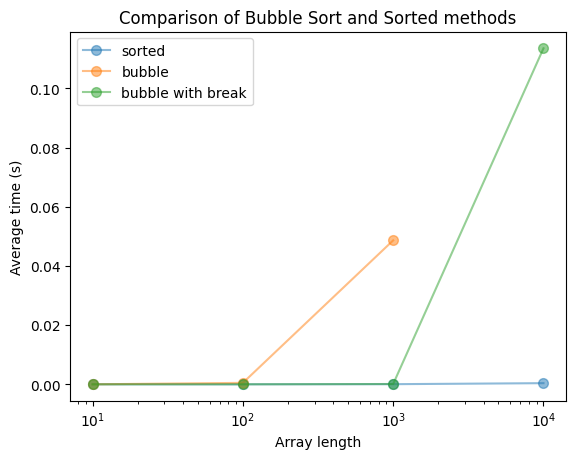

In [9]:
# Plot results
import matplotlib.pyplot as plt

x = [len(arr) for arr in random_arrays]

fig, ax = plt.subplots(1)
ax.plot(x, sorted_times, marker="o", markersize=7, alpha=0.5, label="sorted")
ax.plot(x[:-1], bubble_sort_times, marker="o", markersize=7, alpha=0.5, label="bubble")
ax.plot(x, bubble_sort_break_times, marker="o", markersize=7, alpha=0.5, label="bubble with break")
ax.set_xscale("log")
ax.set_title("Comparison of Bubble Sort and Sorted methods")
ax.set_xlabel("Array length")
ax.set_ylabel("Average time (s)")
ax.legend()
plt.show()
